<pre>
<center><b><h1>Project - 7</b></center>    
<center><b><h1>Principle Component Analysis</b></center>
<pre>

In [ ]:
import numpy as np

In [ ]:
marks = np.array([[90,90,60,60,30],[60,90,60,60,30], [90,30,60,90,30]])

### The Mean Matrix Whould be

In [ ]:
mean_marks=np.mean(marks, axis=1)

In [ ]:
mean_marks

array([66., 60., 60.])

### Step -2 Covariance of Matrix

In [ ]:
CovMat=np.cov(marks, bias=True)

In [ ]:
CovMat

array([[504., 360., 180.],
       [360., 360.,   0.],
       [180.,   0., 720.]])

### step-3 Eigen value Eigen Vector

In [ ]:
eig_val, eig_vec = np.linalg.eig(CovMat)

In [ ]:
eig_val

array([ 44.81966028, 910.06995304, 629.11038668])

In [ ]:
eig_vec

array([[ 0.6487899 , -0.65580225, -0.3859988 ],
       [-0.74104991, -0.4291978 , -0.51636642],
       [-0.17296443, -0.62105769,  0.7644414 ]])

### step -4 Sort EigenValue Choose K EigenVector

In [ ]:
eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(len(eig_val))]

In [ ]:
eig_pairs.sort(key=lambda x: x[0], reverse=True)

In [ ]:
for i in eig_pairs:
    print(i[0])

910.0699530410361
629.1103866763253
44.81966028263878


In [ ]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1),eig_pairs[1][1].reshape(3,1)))

print('Matrix W:\n',matrix_w)

Matrix W:
 [[-0.65580225 -0.3859988 ]
 [-0.4291978  -0.51636642]
 [-0.62105769  0.7644414 ]]


### Step -5 Transform the value in new subspace


In [ ]:
transformed = matrix_w.T.dot(marks-mean_marks.reshape(3,1))

transformed

array([[-34.37098481,  -9.98345733,   3.93481353, -14.69691716,
         55.11654576],
       [ 13.66927088, -47.68820559,   2.31599277,  25.24923474,
          6.45370719]])

### Step-6 Calculating Sklearn

In [ ]:
from sklearn.decomposition import PCA as sklearnPCA

In [ ]:
sklearn_pca=sklearnPCA(n_components=2)

In [ ]:
sklearn_transf=sklearn_pca.fit_transform(marks.T)

In [ ]:
sklearn_transf

array([[-34.37098481, -13.66927088],
       [ -9.98345733,  47.68820559],
       [  3.93481353,  -2.31599277],
       [-14.69691716, -25.24923474],
       [ 55.11654576,  -6.45370719]])

### Step -7  Uniqueness of Principle Component

In [ ]:
sklearn_pca.components_

array([[-0.65580225, -0.4291978 , -0.62105769],
       [ 0.3859988 ,  0.51636642, -0.7644414 ]])

###  Step-8 Proportion Of Variance Explained

In [ ]:
eig_val[::-1].sort()

In [ ]:
eig_val

array([910.06995304, 629.11038668,  44.81966028])

In [ ]:
eig_val/eig_val.sum()

array([0.57453911, 0.39716565, 0.02829524])

In [ ]:
sklearn_pca.explained_variance_ratio_

array([0.57453911, 0.39716565])

In [ ]:
sklearn_pca.explained_variance_ratio_.cumsum()

array([0.57453911, 0.97170476])

### Step-9 Deciding the Number of Components

In [ ]:
marks1 = np.array([[90,90,60,60,30],[60,90,60,60,30],[90,30,60,90,30],[90,60,30,60,90]])

In [ ]:
sklearn_pca = sklearnPCA(n_components=4)

In [ ]:
sklearn_transf = sklearn_pca.fit_transform(marks1.T)

### Graph

In [ ]:
from matplotlib import pyplot as plt

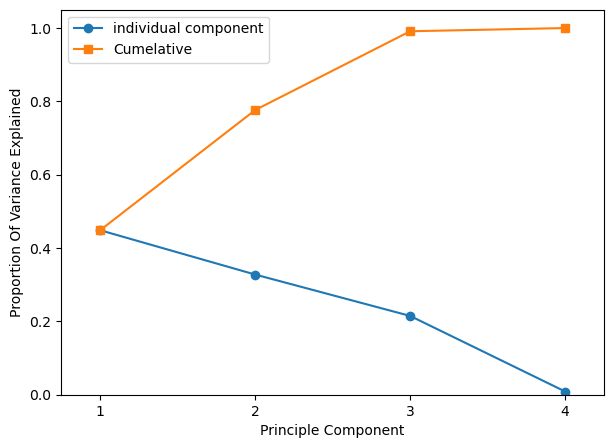

In [ ]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4],sklearn_pca.explained_variance_ratio_,'-o',label='individual component')
plt.plot([1,2,3,4],np.cumsum(sklearn_pca.explained_variance_ratio_),'-s',label='Cumelative')
plt.ylabel("Proportion Of Variance Explained")
plt.xlabel("Principle Component")
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.legend(loc=2)
plt.show()
